### Nathan Reed
### DSC 680
### Project 3 Code
### March 2, 2024

# Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as mt
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
warnings.filterwarnings("ignore")

# Loading in the Data

In [2]:
car_price_df = pd.read_csv("car_price_prediction.csv")
car_price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Data Cleaning

In [3]:
car_price_df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [4]:
num_duplicates = car_price_df.duplicated().sum()
print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 313


In [5]:
car_price_df.drop_duplicates(inplace = True)
print(f'Data after dropping duplicated values has {car_price_df.shape[0]} rows ')

Data after dropping duplicated values has 18924 rows 


In [6]:
car_price_df1 = car_price_df.drop(columns = ["ID", "Doors", "Wheel"], axis = 1)
car_price_df1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4


In [7]:
car_price_df1.replace(to_replace = "-", value = 0, inplace = True)
Levy = car_price_df1["Levy"].astype(int)
car_price_df1.drop(columns = "Levy", axis = 1, inplace = True)
car_price_df1 = pd.concat([car_price_df1, Levy], axis = 1, join = "inner")

In [8]:
temp_1 = car_price_df1["Mileage"].str.split(" km", n = 0, expand = True)
car_price_df1.drop("Mileage", axis = 1, inplace = True)
inted = temp_1[0].astype(int)
car_price_df1["Mileage"] = inted

In [9]:
temp1 = car_price_df1["Engine volume"].str.split(" Turbo", n = 1, expand = True)
floated = temp1[0].astype(float)
car_price_df1["Engine power"] = floated
car_price_df1.drop("Engine volume", axis = 1, inplace = True)
car_price_df1.replace(to_replace = "", value = 1, inplace = True)

In [10]:
car_price_df1['Cylinders'] = car_price_df1['Cylinders'].astype(int)

In [11]:
car_price_df1.drop(index = car_price_df1.loc[car_price_df1["Mileage"] == 0].index, axis = 0, inplace = True)
car_price_df1.loc[car_price_df1["Mileage"] == 0]
car_price_df1.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Color,Airbags,Levy,Mileage,Engine power
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,6,Automatic,4x4,Silver,12,1399,186005,3.5
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,6,Tiptronic,4x4,Black,8,1018,192000,3.0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,4,Variator,Front,Black,2,0,200000,1.3
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,4,Automatic,4x4,White,0,862,168966,2.5
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,4,Automatic,Front,Silver,4,446,91901,1.3


In [12]:
car_price_df1.drop(index = car_price_df1.loc[car_price_df1["Mileage"] > 1000000].index, axis = 0, inplace = True)

In [13]:
car_price_df1.sort_values(by = "Price", ascending = False).head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Color,Airbags,Levy,Mileage,Engine power
16983,26307500,OPEL,Combo,1999,Goods wagon,No,Diesel,4,Manual,Front,Blue,0,0,99999,1.7
8541,872946,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,8,Tiptronic,4x4,Black,0,2067,2531,4.0
5008,308906,PORSCHE,911,2016,Coupe,Yes,Petrol,6,Automatic,Rear,Black,12,1694,8690,4.0
14839,297930,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,8,Tiptronic,4x4,Black,12,0,4500,3.0
9367,297930,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,8,Tiptronic,Rear,White,16,0,20000,4.0


In [14]:
car_price_df1.drop([16983], axis = 0, inplace = True)

# Visualizations

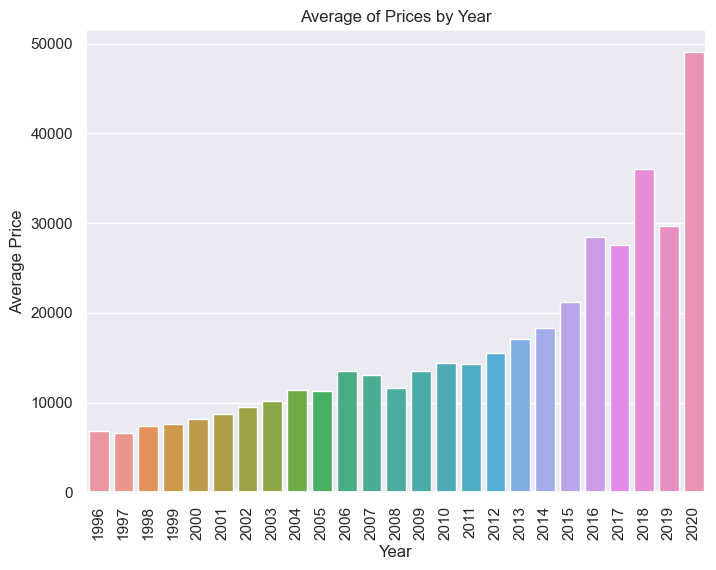

In [15]:
average_prices = car_price_df1.groupby('Prod. year')['Price'].mean().reset_index()
sns.set(style = "darkgrid")
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Prod. year', y = 'Price', data = average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.show()

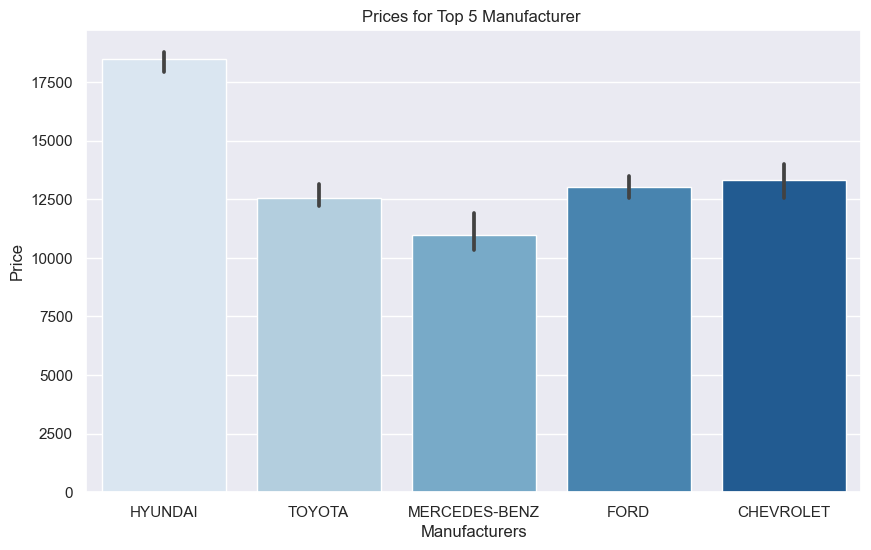

In [16]:
top_manufacturers = car_price_df1['Manufacturer'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Manufacturer', y = 'Price', data = car_price_df1[car_price_df1['Manufacturer'].isin(top_manufacturers)],
            estimator = 'median', order = top_manufacturers, palette = "Blues")
plt.title('Prices for Top 5 Manufacturer ') 
plt.xlabel('Manufacturers')
plt.ylabel('Price')
plt.show()

[Text(0.5, 1.0, 'Average Price of Car by Production Year')]

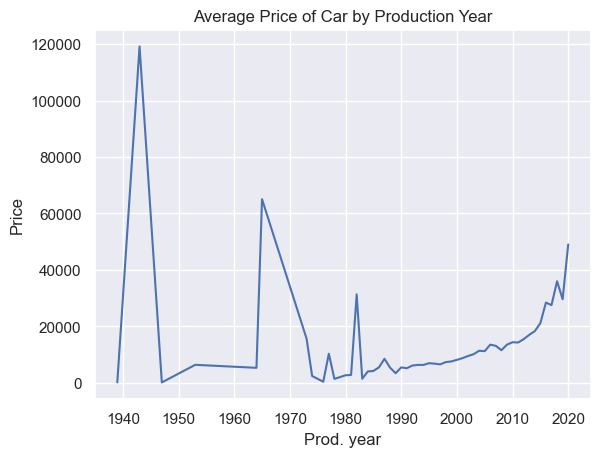

In [17]:
sns.lineplot(data = average_prices, x = average_prices["Prod. year"], y = average_prices["Price"]).set(title = "Average Price of Car by Production Year")

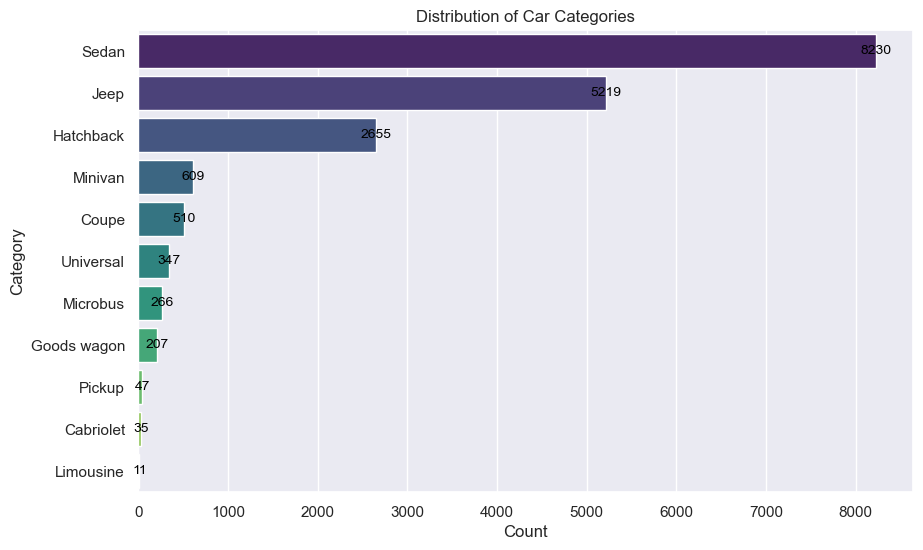

In [18]:
category_counts = car_price_df1['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Count', y = 'Category', data = category_counts, palette = 'viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Car Categories')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha = 'center', va = 'center', fontsize = 10, color = 'black')

plt.show()

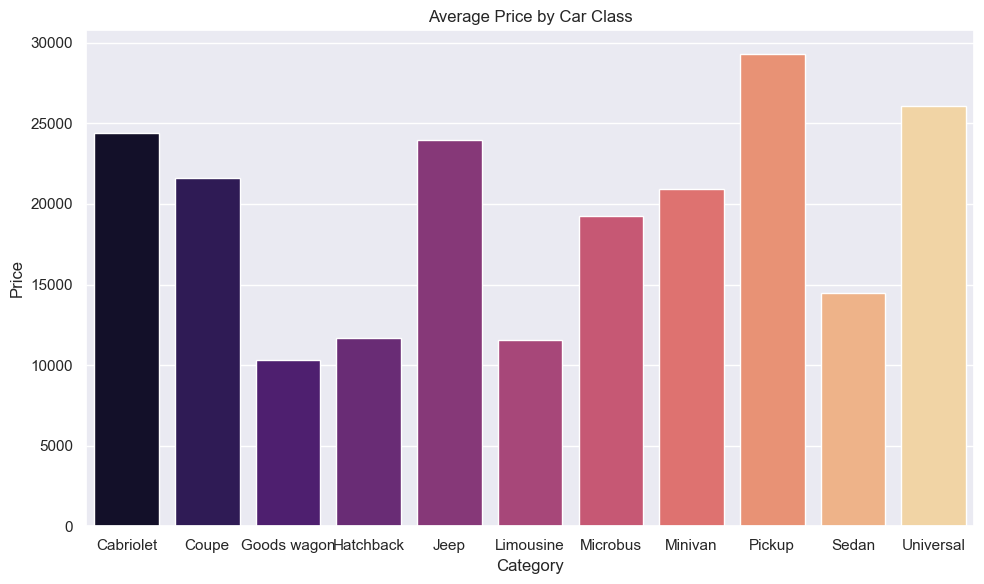

In [19]:
average_prices1 = car_price_df1.groupby('Category')['Price'].mean().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x = "Category", y = "Price", data = average_prices1, errwidth = 0, palette = "magma").set_title('Average Price by Car Class')
plt.tight_layout()

# Dummy Variable and Model Creation

In [20]:
car_price_df1.drop(columns=["Manufacturer", "Model"], axis = 1, inplace = True)
car_price_df1 = pd.get_dummies(car_price_df1, dtype = int)
car_price_df1.head()

,Price,Prod. year,Cylinders,Airbags,Levy,Mileage,Engine power,Category_Cabriolet,Category_Coupe,Category_Goods wagon,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,2010,6,12,1399,186005,3.5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,2011,6,8,1018,192000,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,2006,4,2,0,200000,1.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,2011,4,0,862,168966,2.5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,2014,4,4,446,91901,1.3,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
x = car_price_df1.drop(["Price"], axis=1)
y = car_price_df1[['Price']]
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
models = [('LR', LinearRegression()),
          ('RIDGE', Ridge()),
          ("LASSO", Lasso())]
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, x, y, cv = 5, scoring = "neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 16445.0241 (LR) 
RMSE: 16444.2762 (RIDGE) 
RMSE: 16443.8994 (LASSO) 


In [35]:
lasso = Lasso().fit(x_train, y_train)
rmse = np.mean(np.sqrt(-cross_val_score(lasso, x, y, cv = 5, scoring = "neg_mean_squared_error")))
y_pred = lasso.predict(x_test)

In [36]:
print(f"Result: {rmse}\nScore : {lasso.score(x,y)}")

Result: 16443.899401586274
Score : 0.27452100518752254
